In [ ]:
# Cargamos datos de iris de Fisher
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [ ]:
# Cargamos el dataset de Iris
iris = load_iris()
X = iris.data  # Usamos largo de sépalo y largo de pétalo para visualización 2D
y = iris.target

In [ ]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Clasificadores de discriminante
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
# Ajuste de modelos
lda.fit(X_train, y_train)
qda.fit(X_train, y_train)
# Predict
y_pred_lda = lda.predict(X_test)
y_pred_qda = qda.predict(X_test);

In [ ]:
# Mostrar matrices de confusión
print("Matriz de confusión con LDA:")
print(pd.DataFrame(confusion_matrix(y_test, y_pred_lda),index=iris.target_names, columns=iris.target_names))
print("\nMatriz de confusión con QDA:")
print(pd.DataFrame(confusion_matrix(y_test, y_pred_qda), index=iris.target_names, columns=iris.target_names))

Matriz de confusión con LDA:
            setosa  versicolor  virginica
setosa          19           0          0
versicolor       0          13          0
virginica        0           0         13

Matriz de confusión con QDA:
            setosa  versicolor  virginica
setosa          19           0          0
versicolor       0          13          0
virginica        0           0         13


In [ ]:
# Opcional: reporte de clasificación
print("\nReporte LDA:")
print(classification_report(y_test, y_pred_lda, target_names=iris.target_names))


Reporte LDA:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Reducción de dimensión con PCA
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
# Reducción de dimensión con LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

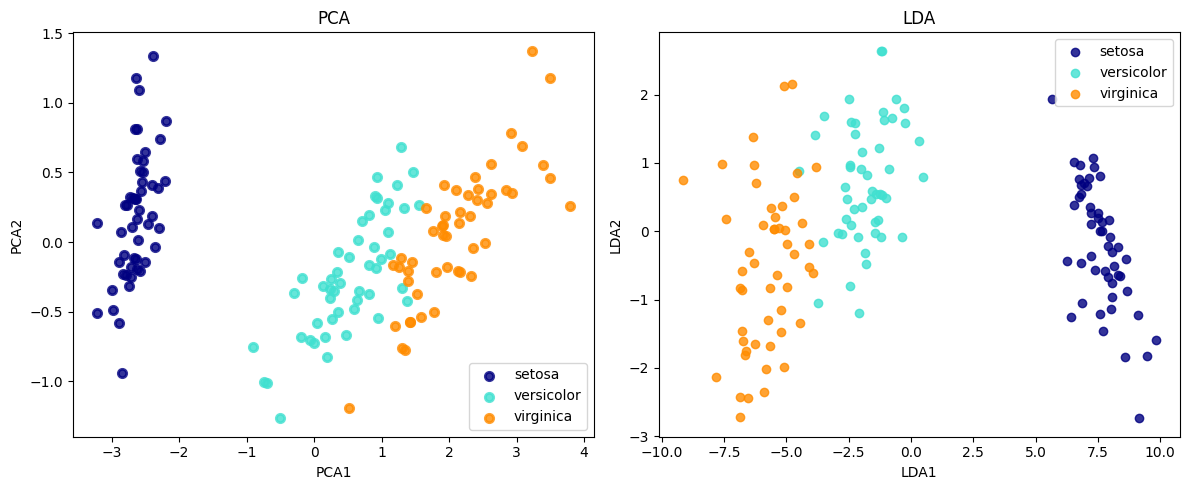

In [ ]:
# Generamos plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas
colors = ["navy", "turquoise", "darkorange"]
lw = 2

# PCA scatter plot
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    axes[0].scatter(
        X_r[y == i, 0], X_r[y == i, 1],
        color=color, alpha=0.8, lw=lw, label=target_name
    )
axes[0].set_title("PCA")
axes[0].set_xlabel("PCA1")
axes[0].set_ylabel("PCA2")
axes[0].legend(loc="best", shadow=False, scatterpoints=1)

# LDA scatter plot
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    axes[1].scatter(
        X_r2[y == i, 0], X_r2[y == i, 1],
        alpha=0.8, color=color, label=target_name
    )
axes[1].set_title("LDA")
axes[1].set_xlabel("LDA1")
axes[1].set_ylabel("LDA2")
axes[1].legend(loc="best", shadow=False, scatterpoints=1)

plt.tight_layout()
plt.show()